In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import optuna

In [2]:
# Charger le fichier
file_path = "train.csv"
df = pd.read_csv(file_path)

# Afficher les premières lignes et les informations générales
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9415 entries, 0 to 9414
Columns: 4297 entries, smiles to class
dtypes: float64(4295), int64(1), object(1)
memory usage: 308.7+ MB


(None,
                                     smiles  BalabanJ     BertzCT       Chi0  \
 0    Brc1cc(Br)c(Oc2cc(Br)c(Br)cc2Br)cc1Br  2.415403  585.102114  14.154336   
 1      Brc1ccc2[nH]c3c(c2c1)CCCC3Nc1ccccc1  1.756595  776.517592  14.233840   
 2  Brc1ccc2c(NC3=NCC4(CN5CCC4CC5)O3)ncnn12  1.393870  796.361052  15.440947   
 3           Brc1cnc2nc(N3CCN4CCC3CC4)oc2c1  1.724265  605.709066  12.819626   
 4        Brc1cncc(COCC2(c3ccccc3)CCNCC2)c1  1.684628  597.045968  15.252866   
 
        Chi0n      Chi0v       Chi1     Chi1n     Chi1v     Chi2n  ...  \
 0   8.985436  18.501415   8.879918  4.851543  9.609532  3.495540  ...   
 1  11.695437  13.281434  10.309663  7.426852  8.219850  5.662312  ...   
 2  12.574323  14.160319  11.233913  7.945929  8.738927  6.525386  ...   
 3  10.549759  12.135755   9.292826  6.705489  7.498487  5.237927  ...   
 4  12.594869  14.180866  10.784424  7.719435  8.512433  5.900562  ...   
 
    fcfc_2039  fcfc_2040  fcfc_2041  fcfc_2042  fcfc_2043  fcfc_2

In [3]:
labels = df["class"]
labels.head()

0    0
1    0
2    1
3    1
4    0
Name: class, dtype: int64

In [4]:
# df_filtered = df.drop(columns=[col for col in df.columns if col.startswith("fcfc") or col.startswith("ecfc")])
df_filtered = df.drop(columns=["class", "smiles"])
df_filtered.head()

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fcfc_2038,fcfc_2039,fcfc_2040,fcfc_2041,fcfc_2042,fcfc_2043,fcfc_2044,fcfc_2045,fcfc_2046,fcfc_2047
0,2.415403,585.102114,14.154336,8.985436,18.501415,8.879918,4.851543,9.609532,3.495540,8.621561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.756595,776.517592,14.233840,11.695437,13.281434,10.309663,7.426852,8.219850,5.662312,6.577987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.393870,796.361052,15.440947,12.574323,14.160319,11.233913,7.945929,8.738927,6.525386,7.337863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.724265,605.709066,12.819626,10.549759,12.135755,9.292826,6.705489,7.498487,5.237927,6.153603,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.684628,597.045968,15.252866,12.594869,14.180866,10.784424,7.719435,8.512433,5.900562,6.816237,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Supposons que df_features contient les features et df_target la colonne cible
X = df_filtered.copy()
y = labels.copy()

# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = XGBClassifier(n_estimators=250, learning_rate=0.16787519093314812, max_depth=7, subsample=0.8413149403890899, colsample_bytree=0.9206075463459951, random_state=42)

In [7]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9206075463459951, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.16787519093314812,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [8]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.822623473181094


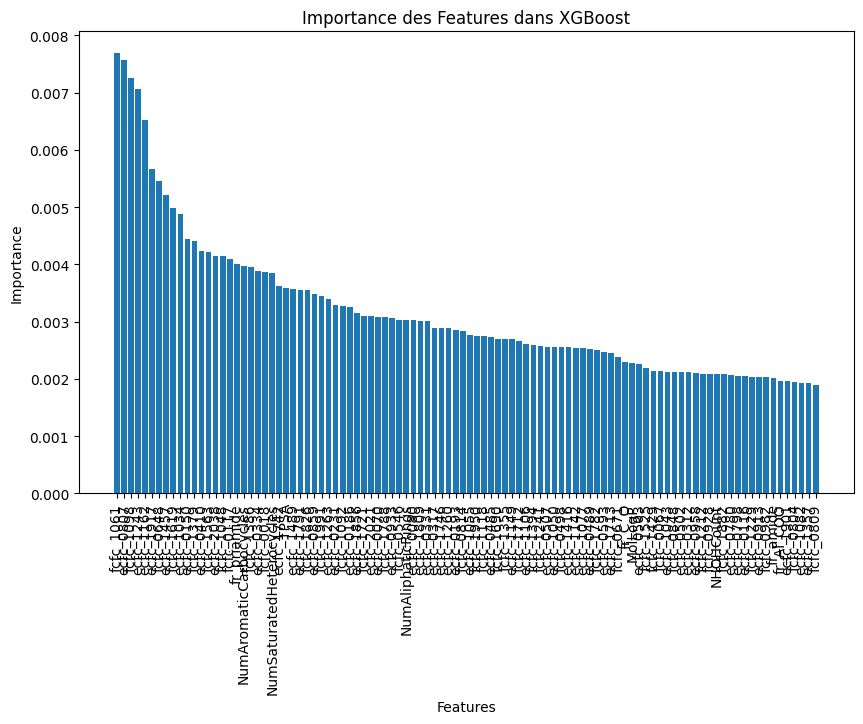

In [9]:
plt.figure(figsize=(10, 6))
n_best_features = 100
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.bar(range(n_best_features), importances[sorted_indices[:n_best_features]], align="center")
plt.xticks(range(n_best_features), X.columns[sorted_indices[:n_best_features]], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Importance des Features dans XGBoost")
plt.show()

In [13]:
print(X.columns[sorted_indices[:n_best_features]])

Index(['fcfc_1061', 'ecfc_0807', 'fcfc_1098', 'ecfc_1243', 'ecfc_1162',
       'ecfc_1917', 'fcfc_0648', 'ecfc_1457', 'fcfc_1619', 'ecfc_1034',
       'ecfc_0150', 'fcfc_1379', 'ecfc_0410', 'fcfc_1563', 'ecfc_2038',
       'fcfc_1048', 'fcfc_0117', 'fr_priamide', 'NumAromaticCarbocycles',
       'fcfc_1386', 'ecfc_0334', 'fcfc_0018', 'NumSaturatedHeterocycles',
       'ecfc_1742', 'TPSA', 'ecfc_1489', 'ecfc_1791', 'fcfc_1826', 'ecfc_0859',
       'fcfc_1991', 'ecfc_1263', 'ecfc_0231', 'fcfc_1092', 'ecfc_0186',
       'ecfc_1856', 'fcfc_1721', 'ecfc_2021', 'ecfc_0070', 'fcfc_1788',
       'ecfc_0933', 'fcfc_0546', 'NumAliphaticRings', 'ecfc_0080', 'ecfc_1809',
       'ecfc_0331', 'ecfc_0317', 'ecfc_1746', 'ecfc_1260', 'ecfc_0193',
       'fcfc_0814', 'ecfc_1055', 'fcfc_1950', 'fcfc_1118', 'ecfc_0485',
       'fcfc_1690', 'fcfc_1355', 'ecfc_1149', 'fcfc_1712', 'ecfc_1106',
       'fcfc_1394', 'fcfc_1241', 'ecfc_0507', 'ecfc_1050', 'fcfc_0498',
       'ecfc_1416', 'ecfc_1142', 'ecfc_1077'

# Fine tune des hyperparamètres avec Optuna

In [10]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10, step=2),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }
    
    model = XGBClassifier(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    return score

In [11]:
# Lancer l'optimisation
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Meilleurs paramètres trouvés
print("Best parameters:", study.best_params_)
print("Best accuracy:", study.best_value)

[I 2025-01-24 22:31:04,599] A new study created in memory with name: no-name-aaf6390b-2738-4e3c-9f0f-7dbd0db30efb
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\distributions.py:699: UserWarning: The distribution is specified by [3, 10] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 9].
  warnings.warn(
[W 2025-01-24 22:31:09,748] Trial 0 failed with parameters: {'n_estimators': 300, 'learning_rate': 0.08561464367329087, 'max_depth': 5, 'subsample': 0.9565538965436688, 'colsample_bytree': 0.876472500427075} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\simon\AppData\Local\Temp\ipykernel_6836\1767936306.py", line 11, in objective
    score = cross_val_score(model, X

KeyboardInterrupt: 

In [12]:
import pickle

# Charger depuis Pickle
with open("optuna_study.pkl", "rb") as f:
    loaded_study = pickle.load(f)

print("Best parameters from Pickle:", loaded_study.best_params)

Best parameters from Pickle: {'n_estimators': 250, 'learning_rate': 0.16787519093314812, 'max_depth': 7, 'subsample': 0.8413149403890899, 'colsample_bytree': 0.9206075463459951}


In [ ]:
import optuna.visualization as vis


# Afficher l’évolution de la performance
vis.plot_optimization_history(loaded_study).show()